<a href="https://colab.research.google.com/github/AndreySukhanov/Deep_Learning/blob/main/cats/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

# Подгрузка датасета от Microsoft

In [2]:
train, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteKOJZ50/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


# Функция для изменения размеров изображения

In [3]:
SIZE = (224, 224)
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, SIZE)
  img /= 255.0
  return img, label

# Уменьшаем размеры всех изображений, полученных из датасета

In [4]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

# Создание основного слоя для создания модели

In [5]:
base_layers = tf.keras.applications.MobileNetV2(input_shape = (SIZE[0], SIZE[1], 3), include_top = False)

9406464/9406464 [==============================] - 0s 0us/step


# Создание модели нейронной сети

In [6]:
from keras.backend import binary_crossentropy
model = tf.keras.Sequential([
    base_layers,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics =['accuracy'])


# Обучение нейронной сети (наши картинки, одна итерация обучения)

In [7]:
model.fit(train_batches, epochs=3)

Epoch 1/3
1454/1454 [==============================] - 154s 81ms/step - loss: 0.1619 - accuracy: 0.9340
Epoch 2/3
1454/1454 [==============================] - 118s 80ms/step - loss: 0.1093 - accuracy: 0.9531
Epoch 3/3
1454/1454 [==============================] - 118s 80ms/step - loss: 0.0997 - accuracy: 0.9601


# Функция для подгрузки изображений

In [8]:
files.upload()

Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Saving 10.jpg to 10.jpg


{'1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x13\x13\x13\x16\x16\x15\x17\x17\x17\x18\x18\x18\x18\x17\x18\x18\x18\x17\x18\x17\x17\x17\x16\x17\x17\x18\x17\x18\x1d( \x18\x1a%\x1d\x15\x17!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b/% %--/------/----------------------------------------\xff\xc0\x00\x11\x08\x00\xb7\x01\x14\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x00\x02\x05\x06\x01\x07\xff\xc4\x00:\x10\x00\x01\x03\x02\x04\x05\x01\x06\x05\x03\x04\x02\x03\x00\x00\x00\x01\x00\x02\x11\x03!\x04\x121A\x05"Qaq\x81\x132\x91\xa1\xb1\xf0\x06\x14R\xc1\xd1#B\xe13b\x82\xf1\x15\xd2Cr\xa2\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x00\x04\x05\xff\xc4\x00)\x11\x00\x02\x02\x02\x02\x01\x03\x04\x01\x05\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03!\x121A\x13"Q\x042aq\xb1\x14\

# Название изображений

In [9]:
images = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg']

# Перебор изображений

1/1 [==============================] - 0s 26ms/step


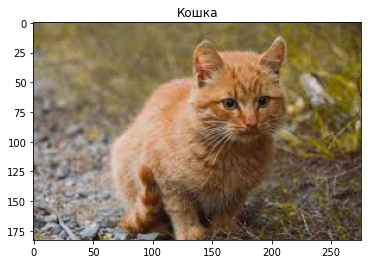

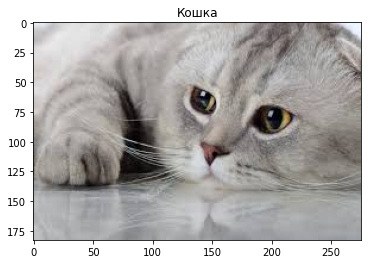

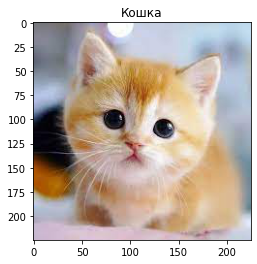

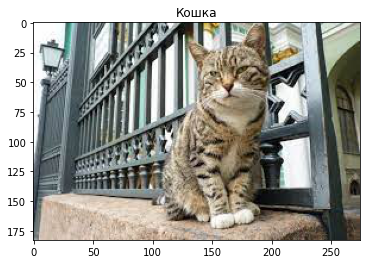

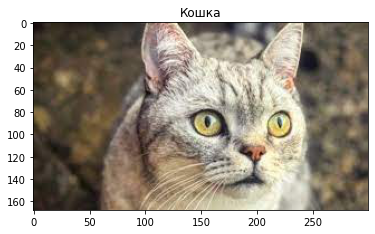

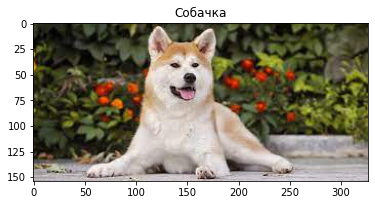

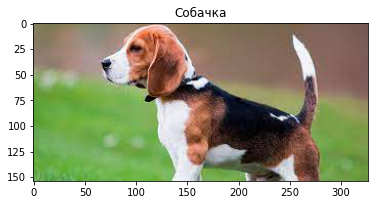

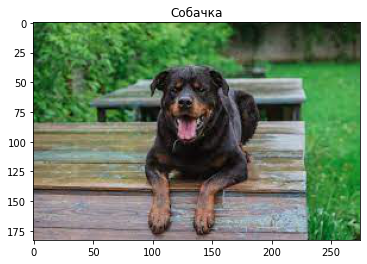

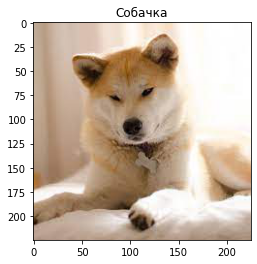

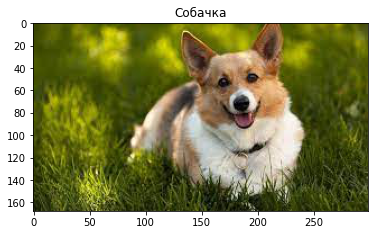

In [10]:
for i in images:
	img = load_img(i)
	img_array = img_to_array(img)
	img_resized, _ = resize_image(img_array, _)
	img_expended = np.expand_dims(img_resized, axis=0)
	prediction = model.predict(img_expended)
	plt.figure()
	plt.imshow(img)
	label = 'Собачка' if prediction > 0 else 'Кошка'
	plt.title('{}'.format(label))